![meme](https://images.ctfassets.net/be04ylp8y0qc/1AYDDqzqoLNU7GyvMOLlTL/146ab0e8b96a25c1b3538a2929dae646/meme_6cce0f3bba63820b84f52ce05a822975_800.png?fm=jpg)

In [ ]:
import numpy as np
import matplotlib.pyplot as plt 
from mpl_toolkits import mplot3d
from sklearn import datasets
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier

Above I am importing libraries

In [ ]:
iris = datasets.load_iris()
X = iris.data
Y = iris.target
Xzeros0 = (0. * X) + .2
Xzeros1 = (0. * X) 
Xzeros2 = (0. * X) - .2
x_min, x_max = X.min() - 0.5, X.max() + 1.5

Import Iris datasets ^

In [ ]:
IC = np.unique(Y)
IrisC = ('Setosa','Versicolor','Virginica')
pltC = ('red', 'blue', 'green')
pltCback = ('pink', 'lightblue','lightgreen')
pltM = ('o', 'x', '*')
for i in range(0,3):
    print (IC[i],pltM[i],IrisC[i],pltC[i],pltCback[i])
          

0 o Setosa red pink
1 x Versicolor blue lightblue
2 * Virginica green lightgreen


Get Iris classifications ^

In [ ]:
IrisF=("sepal length (cm)", "sepal width (cm)", "petal length (cm)", "petal width (cm)")

In [ ]:
Setup Iris feature labels ^

In [ ]:
# The code within this function is largely taken from code by Erik Grimmelmann, but I used
# a function instead of recompiling the original cells.  This function will allow me to build the XX and YY arrays, fit the
# data, and possibly plot the data as I run through each dataset-model pair.

def buildAndFit(cdx, fdx, nC, nF, lfn, plot = False):
    i = 0
    numY = 0
    for i in range(len(Y)):
        for j in range(nC):
            if Y[i] == IC[cdx[j]]:
                numY += 1

    YY = np.zeros((numY))
    XX = np.zeros((numY,nF))
    if (len(fdx) == 1):
        XXzeros0 = (0. * XX) + .2
        XXzeros1 = (0. * XX) 
        XXzeros2 = (0. * XX) - .2

  
    # Fill XX and YY arrays
    j = 0
    for i in range(len(Y)):
        for k in range(nC):
            if Y[i] == IC[cdx[k]]:        
                YY[j] = IC[cdx[k]]
                for m in range(nF):
                    XX[j,m] = X[i,fdx[m]] 
                j += 1

    lossfn = ['hinge','perceptron','log','modified_huber']

    clf = SGDClassifier(lossfn[lfn],tol=1e-4, random_state=0)
    clf.fit(XX,YY)

    print('\nLoss Function: ', lossfn[lfn], '\nScore: ',clf.score(XX,YY))

    if plot:
        ## plot data for this pair of features and classes
        plt.close('all')

        if (nF == 1):
        
        fig, ax = plt.subplots(figsize=(8,2))
        
        xx = np.arange(x_min,x_max, 0.05).reshape((-1,1))
        yy = clf.predict(xx)
        
        xxzeros1 = (0. * xx) + .5

    # plot the decision regions

        if (IC[0] in cdx): ax.scatter(xx[yy == IC[0],0], xxzeros1[yy == IC[0]],
                        color=pltC[0], marker='.')
        if (IC[1] in cdx): ax.scatter(xx[yy == IC[1],0], xxzeros1[yy == IC[1]],
                        color=pltC[1], marker='.')
        if (IC[2] in cdx): ax.scatter(xx[yy == IC[2],0], xxzeros1[yy == IC[2]],
                        color=pltC[2], marker='.')   

    # plot the data

        if (IC[0] in cdx): ax.scatter(XX[YY == IC[0],0], XXzeros0[YY == IC[0]],
                        color=pltC[0], marker=pltM[0], label=IrisC[0])
        if (IC[1] in cdx): ax.scatter(XX[YY == IC[1],0], XXzeros1[YY == IC[1]],
                        color=pltC[1], marker=pltM[1], label=IrisC[1])
        if (IC[2] in cdx): ax.scatter(XX[YY == IC[2],0], XXzeros2[YY == IC[2]],
                        color=pltC[2], marker=pltM[2], label=IrisC[2])    
        
        ax.set_xlim(x_min,x_max)
        ax.set_ylim(-1.,+2.)
        ax.set_xlabel(IrisF[fdx[0]])
        ax.axes.yaxis.set_visible(False)
        ax.legend(loc='upper right', fontsize='x-small')
        plt.show()    

    elif (nF == 2):
        
        fig, ax = plt.subplots(figsize=(8,8))

        xx1, xx2 = np.meshgrid(np.arange(x_min,x_max,0.05), np.arange(x_min,x_max,0.05))                     
        yy = clf.predict(np.c_[xx1.ravel(), xx2.ravel()])
        yy = yy.reshape(xx1.shape)

    # plot the decision regions    
        
        if (IC[0] in cdx): ax.scatter(xx1[yy == IC[0]], xx2[yy == IC[0]],
                        color=pltCback[0], marker='.')
        if (IC[1] in cdx): ax.scatter(xx1[yy == IC[1]], xx2[yy == IC[1]], 
                        color=pltCback[1], marker='.')
        if (IC[2] in cdx): ax.scatter(xx1[yy == IC[2]], xx2[yy == IC[2]],
                        color=pltCback[2], marker='.')    

    elif (nF == 3):
          
        ixm = fdx[0]
        iym = fdx[1]
        izm = fdx[2]
        xF = IrisF[ixm]
        yF = IrisF[iym]
        zF = IrisF[izm]

        fig = plt.figure(figsize=(6,6))    
        ax = plt.axes(projection='3d')   

  # plot the data points

    if (IC[0] in cdx): ax.scatter3D(X[Y == IC[0],ixm], X[Y == IC[0],iym], X[Y == IC[0],izm], 
      color=pltC[0], marker=pltM[0], label=IrisC[0])
    if (IC[1] in cdx): ax.scatter3D(X[Y == IC[1],ixm], X[Y == IC[1],iym], X[Y == IC[1],izm], 
      color=pltC[1], marker=pltM[1], label=IrisC[1])
    if (IC[2] in cdx): ax.scatter3D(X[Y == IC[2],ixm], X[Y == IC[2],iym], X[Y == IC[2],izm], 
      color=pltC[2], marker=pltM[2], label=IrisC[2])    

    ax.set_xlim(x_min,x_max)
    ax.set_ylim(x_min,x_max)
    ax.set_zlim(x_min,x_max)
    ax.set_xlabel(xF)
    ax.set_ylabel(yF)
    ax.set_zlabel(zF)            
    ax.legend(loc='upper right', fontsize='small')
    plt.show() 
      
  # if there are two classes, add the decision boundary and plot again
              
    A = clf.fit(XX,YY)
    Acl =  A.classes_
    if (len(Acl) == 2):  
          
        fig = plt.figure(figsize=(6,6))    
        ax = plt.axes(projection='3d')   

      # plot the data points

        if (IC[0] in cdx): ax.scatter3D(X[Y == IC[0],ixm], X[Y == IC[0],iym], X[Y == IC[0],izm], 
              color=pltC[0], marker=pltM[0], label=IrisC[0])
        if (IC[1] in cdx): ax.scatter3D(X[Y == IC[1],ixm], X[Y == IC[1],iym], X[Y == IC[1],izm], 
              color=pltC[1], marker=pltM[1], label=IrisC[1])
        if (IC[2] in cdx): ax.scatter3D(X[Y == IC[2],ixm], X[Y == IC[2],iym], X[Y == IC[2],izm], 
              color=pltC[2], marker=pltM[2], label=IrisC[2])    

        
        Ai = A.intercept_
        Acoef = A.coef_
        xgrid = np.arange(x_min,x_max,0.05)       
        nx = len(xgrid)
        for i in range(nx):
            for j in range(nx):
                z = -(Acoef[0,0]*xgrid[i]+Acoef[0,1]*xgrid[j]+Ai[0])/Acoef[0,2]
                if ((z>=x_min)&(z<=x_max)): ax.scatter3D(xgrid[i],xgrid[j],z,marker='.',color='lightgray')

        ax.set_xlim(x_min,x_max)
        ax.set_ylim(x_min,x_max)
        ax.set_zlim(x_min,x_max)
        ax.set_xlabel(xF)
        ax.set_ylabel(yF)
        ax.set_zlabel(zF)            
        ax.legend(loc='upper right', fontsize='small')
        plt.show()         


Loss Function:  hinge 
Score:  0.68


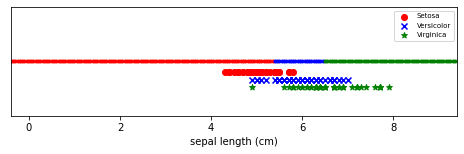


Loss Function:  perceptron 
Score:  0.5533333333333333


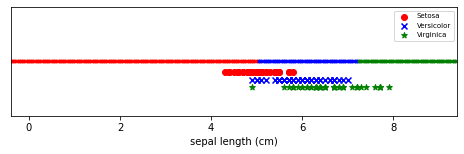


Loss Function:  log 
Score:  0.6733333333333333


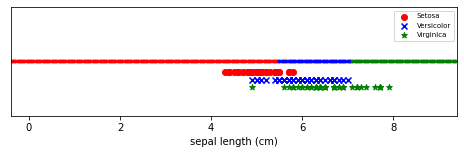


Loss Function:  modified_huber 
Score:  0.3333333333333333


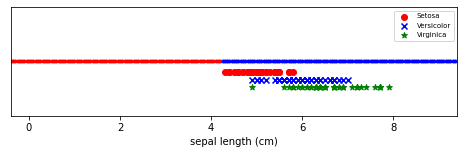

In [ ]:
# Classes: Setosa, Versicolor, Virginica
# Feature: sepal length

cdx = np.array([0,1,2])             
fdx = np.array([0])           

for i in range(4):
    buildAndFit(cdx, fdx, len(cdx), len(fdx), i, True)

In [ ]:
# Classes: Versicolors, Virginica
# Features: sepal length, sepal width, petal length, petal width

cdx = np.array([1,2])
fdx = np.array([0,1,2,3])

for i in range(4):
  buildAndFit(cdx, fdx, len(cdx), len(fdx), i)




Loss Function:  hinge 
Score:  0.83

Loss Function:  perceptron 
Score:  0.83

Loss Function:  log 
Score:  0.9

Loss Function:  modified_huber 
Score:  0.96


In [ ]:
# Classes: Versicolors, Virginica
# Features: sepal length, petal length, petal width

cdx = np.array([1,2])
fdx = np.array([0,2,3])

for i in range(4):
  buildAndFit(cdx, fdx, len(cdx), len(fdx), i)


Loss Function:  hinge 
Score:  0.75

Loss Function:  perceptron 
Score:  0.85

Loss Function:  log 
Score:  0.96

Loss Function:  modified_huber 
Score:  0.95


In [ ]:
# Classes: Versicolors, Virginica
# Features: sepal length, sepal width, petal width

cdx = np.array([1,2])
fdx = np.array([0,1,3])

for i in range(4):
  buildAndFit(cdx, fdx, len(cdx), len(fdx), i)


Loss Function:  hinge 
Score:  0.91

Loss Function:  perceptron 
Score:  0.95

Loss Function:  log 
Score:  0.81

Loss Function:  modified_huber 
Score:  0.93


In the four cells above, I am testing out different loss functions for different dataset-model pairs using the buildAndFit function